# **Task 3 - Feature Engineering**

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

# Importing modules from scripts 

In [7]:
from scripts.feature_engineering import *
from scripts.logger import setup_logger

In [8]:

#logger
logger = setup_logger('feature_engineering_logger', '../logs/FE.log')

# Load the data

In [9]:
data = pd.read_csv('../data/data.csv')
logger.info("Data loaded successfully.")
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [11]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


# Summary statistics

In [12]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


# **1.** Aggregate Features

In [13]:
data = create_aggregate_features(data)
print("\nAfter creating aggregate features:")
print(data[['CustomerId', 'TotalTransactionAmount', 'AverageTransactionAmount', 'TransactionCount', 'StdDevTransactionAmount']].head())
logger.info("creating aggregate features on Amount")


After creating aggregate features:
        CustomerId  TotalTransactionAmount  AverageTransactionAmount  \
0  CustomerId_4406               109921.75                923.712185   
1  CustomerId_4406               109921.75                923.712185   
2  CustomerId_4683                 1000.00                500.000000   
3   CustomerId_988               228727.20               6019.136842   
4   CustomerId_988               228727.20               6019.136842   

   TransactionCount  StdDevTransactionAmount  
0               119              3042.294251  
1               119              3042.294251  
2                 2                 0.000000  
3                38             17169.241610  
4                38             17169.241610  


# **2.** Extract Features

In [14]:
data = extract_time_features(data)
print("\nAfter extracting time features:")
print(data[['CustomerId', 'TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head())
logger.info("extracted features from TransactionStartTime ")


After extracting time features:
        CustomerId      TransactionStartTime  TransactionHour  TransactionDay  \
0  CustomerId_4406 2018-11-15 02:18:49+00:00                2              15   
1  CustomerId_4406 2018-11-15 02:19:08+00:00                2              15   
2  CustomerId_4683 2018-11-15 02:44:21+00:00                2              15   
3   CustomerId_988 2018-11-15 03:32:55+00:00                3              15   
4   CustomerId_988 2018-11-15 03:34:21+00:00                3              15   

   TransactionMonth  TransactionYear  
0                11             2018  
1                11             2018  
2                11             2018  
3                11             2018  
4                11             2018  


In [15]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdDevTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


In [16]:
data.shape

(95662, 24)

# **3.** Encode Categorical Variables

In [17]:
categorical_columns = ['ProductCategory', 'ChannelId', 'PricingStrategy','CustomerId','ProviderId']
logger.info("categorical features are encoded using onehot encoder")
print("\nEncoding categorical features...")
df_encoded = encode_categorical_features(data, categorical_columns)
df_encoded.head()


Encoding categorical features...


,TransactionId,BatchId,AccountId,SubscriptionId,CurrencyCode,CountryCode,ProductId,Amount,Value,TransactionStartTime,...,CustomerId_CustomerId_993,CustomerId_CustomerId_994,CustomerId_CustomerId_996,CustomerId_CustomerId_998,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,UGX,256,ProductId_10,1000.0,1000,2018-11-15 02:18:49+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,UGX,256,ProductId_6,-20.0,20,2018-11-15 02:19:08+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,UGX,256,ProductId_1,500.0,500,2018-11-15 02:44:21+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,UGX,256,ProductId_21,20000.0,21800,2018-11-15 03:32:55+00:00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,UGX,256,ProductId_6,-644.0,644,2018-11-15 03:34:21+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **4.** Handle Missing Values

In [18]:
data = handle_missing_values(data)
print("\nAfter handling missing values:")
print(data.isnull().sum())


After handling missing values:
TransactionId               0
BatchId                     0
AccountId                   0
SubscriptionId              0
CustomerId                  0
CurrencyCode                0
CountryCode                 0
ProviderId                  0
ProductId                   0
ProductCategory             0
ChannelId                   0
Amount                      0
Value                       0
TransactionStartTime        0
PricingStrategy             0
FraudResult                 0
TotalTransactionAmount      0
AverageTransactionAmount    0
TransactionCount            0
StdDevTransactionAmount     0
TransactionHour             0
TransactionDay              0
TransactionMonth            0
TransactionYear             0
dtype: int64


# **5.** Normalize/Standardize Numerical Features

In [19]:
data = normalize_features(data)
print("\nAfter normalizing features:")
logger.info("scaled numeric features")
print(data.describe())


After normalizing features:
       CountryCode        Amount         Value  PricingStrategy   FraudResult  \
count      95662.0  9.566200e+04  9.566200e+04     9.566200e+04  9.566200e+04   
mean           0.0 -2.376844e-18 -5.347900e-18     1.342917e-16 -8.616060e-18   
std            0.0  1.000005e+00  1.000005e+00     1.000005e+00  1.000005e+00   
min            0.0 -8.164376e+00 -8.039691e-02    -3.078062e+00 -4.496219e-02   
25%            0.0 -5.488653e-02 -7.817959e-02    -3.492524e-01 -4.496219e-02   
50%            0.0 -4.637114e-02 -7.229109e-02    -3.492524e-01 -4.496219e-02   
75%            0.0 -3.177332e-02 -3.980285e-02    -3.492524e-01 -4.496219e-02   
max            0.0  8.007129e+01  8.016556e+01     2.379557e+00  2.224091e+01   

       TotalTransactionAmount  AverageTransactionAmount  TransactionCount  \
count            9.566200e+04              9.566200e+04      9.566200e+04   
mean             7.368217e-17             -2.376844e-18      1.901475e-17   
std       

In [20]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdDevTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,0.0,ProviderId_6,ProductId_10,airtime,...,-0.349252,-0.044962,0.170118,-0.067623,-0.311831,-0.167524,-2.155530,-0.100739,0.848684,-0.994246
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,-0.349252,-0.044962,0.170118,-0.067623,-0.311831,-0.167524,-2.155530,-0.100739,0.848684,-0.994246
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,0.0,ProviderId_6,ProductId_1,airtime,...,-0.349252,-0.044962,0.165122,-0.072568,-0.444993,-0.201719,-2.155530,-0.100739,0.848684,-0.994246
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,0.0,ProviderId_1,ProductId_21,utility_bill,...,-0.349252,-0.044962,0.175567,-0.008155,-0.404020,-0.008737,-1.949214,-0.100739,0.848684,-0.994246
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,-0.349252,-0.044962,0.175567,-0.008155,-0.404020,-0.008737,-1.949214,-0.100739,0.848684,-0.994246


# Calculate RFMS scores

In [21]:
rfms_scores = rfms_score(data)
rfms_scores.head()
logger.info("RFM Scores are calculated")

In [22]:
rfms_scores.tail()

,Recency,Frequency,MonetaryTotal,MonetaryAvg,Recency_Normalized,Frequency_Normalized,MonetaryTotal_Normalized,MonetaryAvg_Normalized,RFMS_Score
CustomerId,,,,,,,,,
CustomerId_992,4,6,-0.164688,-0.027448,0.044444,0.001222,0.615463,0.047451,0.404923
CustomerId_993,25,5,-0.110207,-0.022041,0.277778,0.000978,0.615495,0.047525,0.346555
CustomerId_994,0,101,-1.091831,-0.010810,0.000000,0.024450,0.614932,0.047678,0.421765
CustomerId_996,67,17,0.201098,0.011829,0.744444,0.003912,0.615673,0.047988,0.230782
CustomerId_998,0,22,-0.387593,-0.017618,0.000000,0.005134,0.615336,0.047585,0.417014


# Distribution of RFMS scores

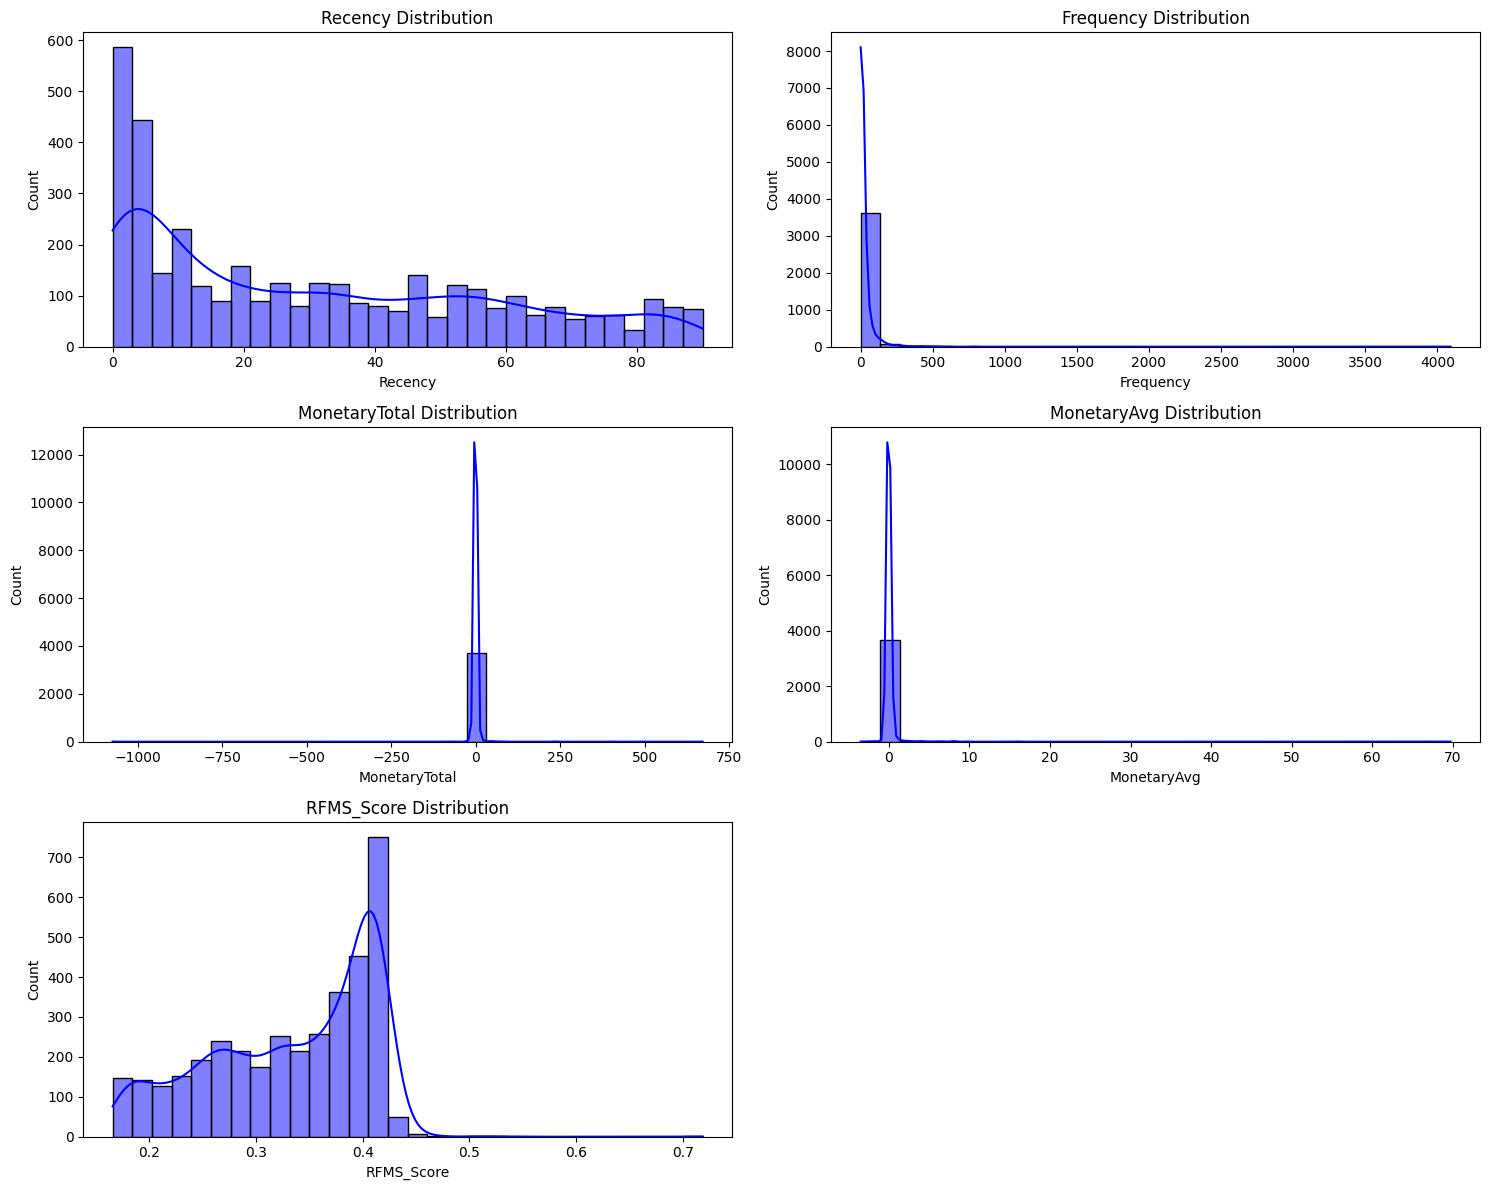

In [23]:
plot_rfms_distributions(rfms_scores)

In [25]:
print(rfms_scores.columns)

Index(['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg',
       'Recency_Normalized', 'Frequency_Normalized',
       'MonetaryTotal_Normalized', 'MonetaryAvg_Normalized', 'RFMS_Score'],
      dtype='object')


# Correlation Matrix

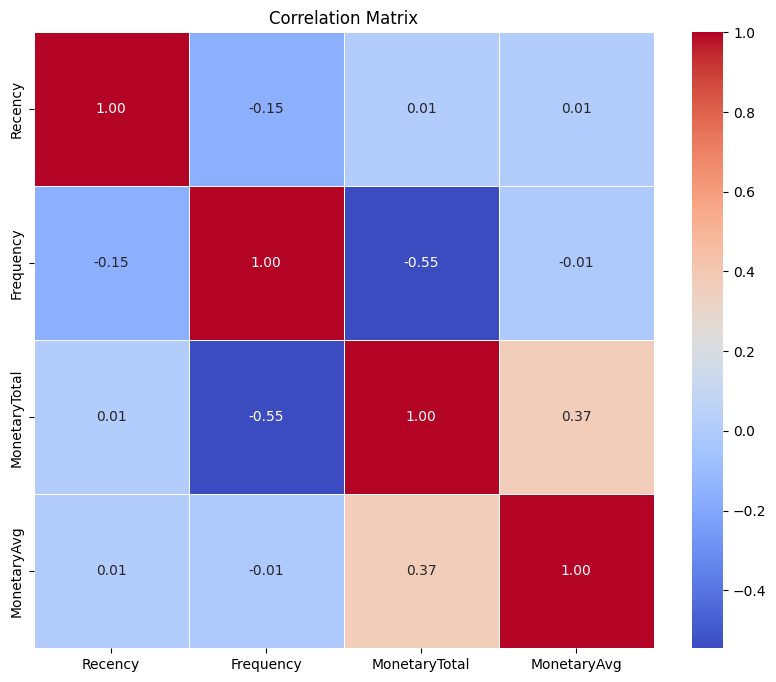

In [24]:
selected_columns = ['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg']
correlation_matrix = rfms_scores[selected_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Assign good/bad labels

In [26]:
data = assign_good_bad_label(data, rfms_scores)
logger.info(" labels is assigned based on RFMS_Score")
print("\nAfter assigning good/bad labels:")
print(data[['CustomerId', 'RFMS_Score', 'label']].drop_duplicates().head(10))


After assigning good/bad labels:
         CustomerId  RFMS_Score label
0   CustomerId_4406    0.422097  good
2   CustomerId_4683    0.190720   bad
3    CustomerId_988    0.404168  good
5   CustomerId_1432    0.165710   bad
6   CustomerId_2858    0.403454  good
8    CustomerId_598    0.171433   bad
9   CustomerId_1053    0.168820   bad
10  CustomerId_3052    0.246831   bad
16  CustomerId_3105    0.426416  good
19  CustomerId_3507    0.305098   bad


In [27]:
data = data.merge(rfms_scores[['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg']], left_on='CustomerId', right_index=True, how='left')

In [28]:
# Display RFMS values along with RFM_Score and risk label
data[['CustomerId',	'Recency',	'Frequency',	'MonetaryTotal','MonetaryAvg',	'RFMS_Score','label']].head(10)

,CustomerId,Recency,Frequency,MonetaryTotal,MonetaryAvg,RFMS_Score,label
0,CustomerId_4406,0,119,-5.591789,-0.046990,0.422097,good
1,CustomerId_4406,0,119,-5.591789,-0.046990,0.422097,good
2,CustomerId_4683,81,2,-0.100852,-0.050426,0.190720,bad
3,CustomerId_988,5,38,-0.215326,-0.005666,0.404168,good
4,CustomerId_988,5,38,-0.215326,-0.005666,0.404168,good
5,CustomerId_1432,90,1,-0.038261,-0.038261,0.165710,bad
6,CustomerId_2858,5,29,-0.822486,-0.028362,0.403454,good
7,CustomerId_2858,5,29,-0.822486,-0.028362,0.403454,good
8,CustomerId_598,88,4,-0.152558,-0.038140,0.171433,bad
9,CustomerId_1053,89,7,-0.269548,-0.038507,0.168820,bad


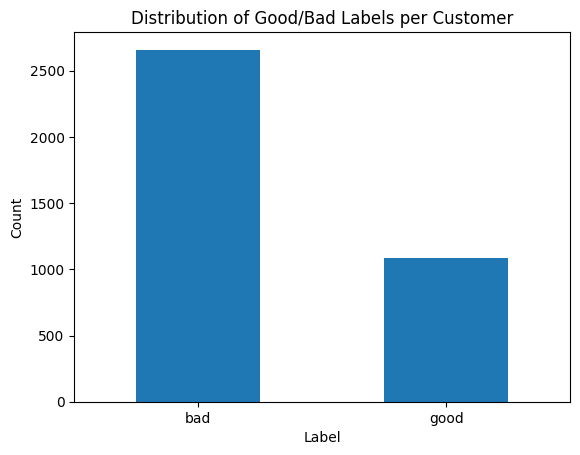

In [29]:
# Get the counts of each label
label_counts = data[['CustomerId', 'label']].drop_duplicates()['label'].value_counts()

# Plot
label_counts.plot(kind='bar')
plt.title('Distribution of Good/Bad Labels per Customer')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the label names horizontal
plt.show()

# Visualize RFMS scores

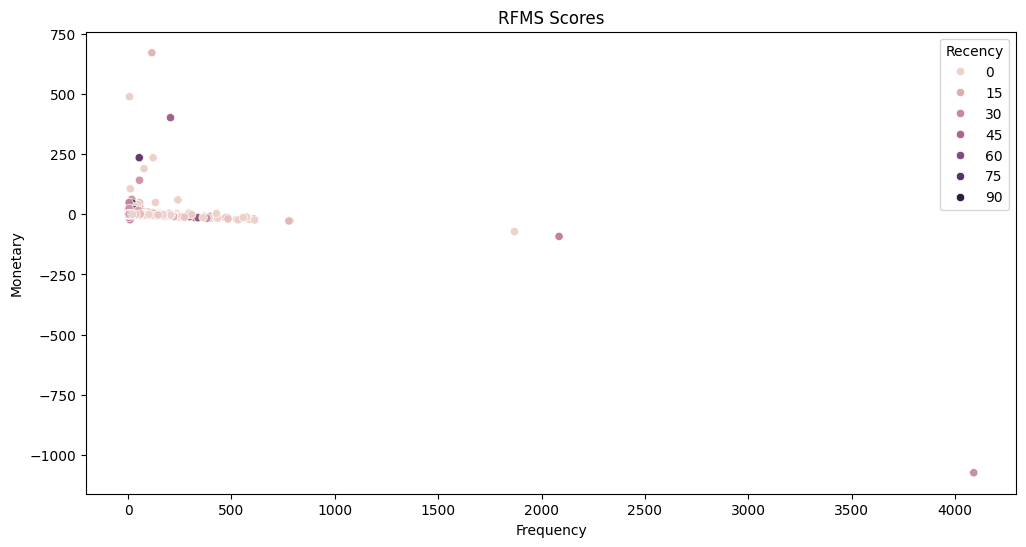

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='MonetaryTotal', hue='Recency', data=rfms_scores)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFMS Scores')
plt.show()